In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Iris = pd.read_csv("Iris.csv")

In [2]:
#(Q)how many data-points & features?
print(Iris.shape)

(150, 6)


In [6]:
#(Q) What are the column names in our dataset?
print(Iris.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [4]:
#How many data points for each class are present?
#(or)How many flowers for each species are present?

Iris["Species"].value_counts()
#balanced-datasets vs imbalanced datasets
#Iris is a balanced dataset as the number of data points for every class is 50

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

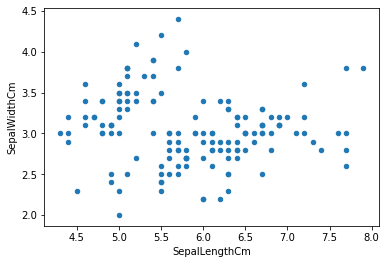

In [3]:
#2-D scatter plot:
#ALWAYS understand the axis:labels and scale

Iris.plot(kind ='scatter',x='SepalLengthCm', y='SepalWidthCm');
plt.show()
#cannot make much sense out of it
#What if we color the points by their class-label/flower-type

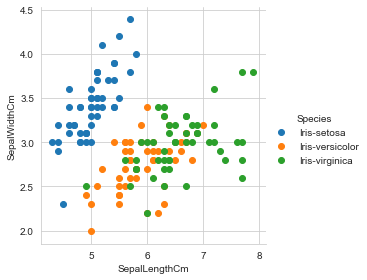

In [30]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(Iris, hue="Species", height=4) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();
plt.show();

# Notice that the blue points can be easily seperated 
# from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 4C2 = 6.

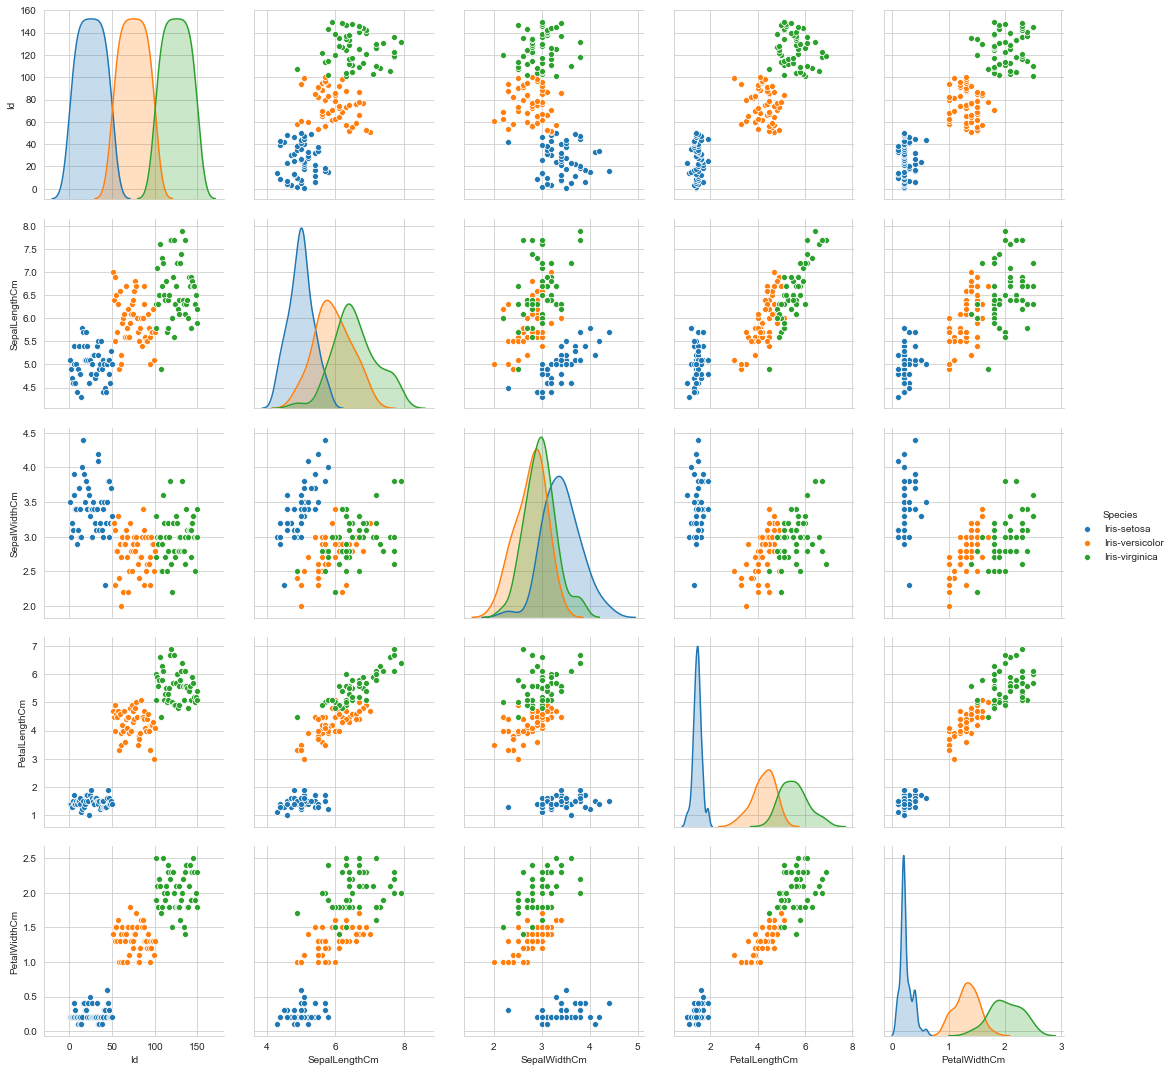

In [24]:
#pairwise scatter plot:Pair_plot
#Disadvantages:
##Can be used when number of features are high
##cannot visualize higher dimensional patterns in 3D and 4D
#Only posssible to view 2D plots
plt.close();
sns.set_style("whitegrid");
sns.pairplot(Iris,hue="Species",height=3);
plt.show()

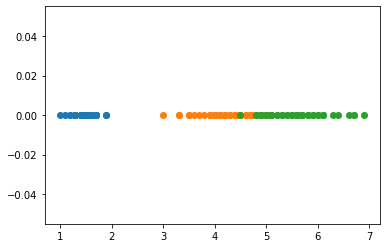

In [4]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
import numpy as np
Iris_setosa = Iris.loc[Iris["Species"] == "Iris-setosa"];
Iris_virginica = Iris.loc[Iris["Species"] == "Iris-virginica"];
Iris_versicolor = Iris.loc[Iris["Species"] == "Iris-versicolor"];
#print(iris_setosa["PetalLengthCm"])
plt.plot(Iris_setosa["PetalLengthCm"], np.zeros_like(Iris_setosa['PetalLengthCm']), 'o')
plt.plot(Iris_versicolor["PetalLengthCm"], np.zeros_like(Iris_versicolor['PetalLengthCm']), 'o')
plt.plot(Iris_virginica["PetalLengthCm"], np.zeros_like(Iris_virginica['PetalLengthCm']), 'o')

plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

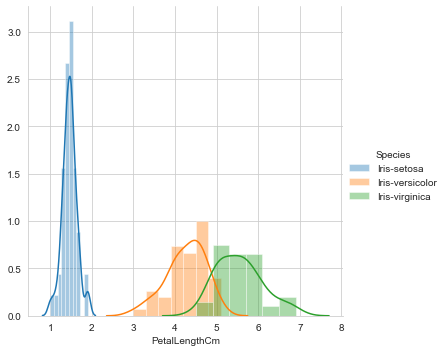

In [38]:
sns.FacetGrid(Iris,hue="Species",height=5)\
   .map(sns.distplot,"PetalLengthCm") \
    .add_legend();
plt.show()    

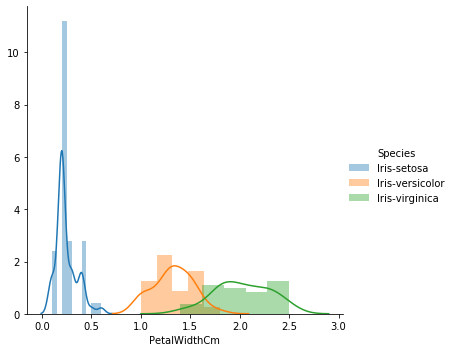

In [2]:
sns.FacetGrid(Iris, hue="Species", height=5) \
   .map(sns.distplot, "PetalWidthCm") \
   .add_legend();
plt.show();

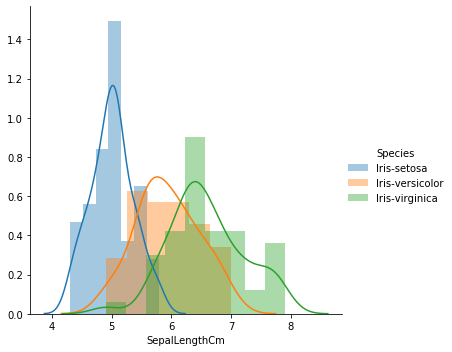

In [6]:
sns.FacetGrid(Iris, hue="Species", height=5) \
   .map(sns.distplot, "SepalLengthCm") \
   .add_legend();
plt.show();

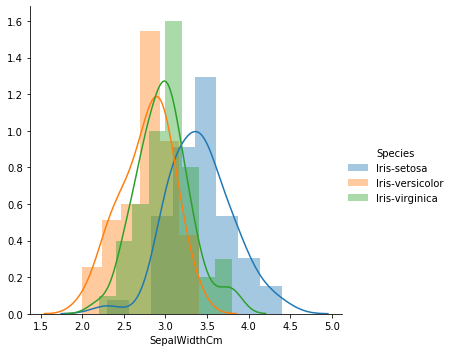

In [7]:
sns.FacetGrid(Iris, hue="Species", height=5) \
   .map(sns.distplot, "SepalWidthCm") \
   .add_legend();
plt.show();

In [ ]:
# Histograms and Probability Density Functions (PDF) using KDE
# How to compute PDFs using counts/frequencies of data points in each window.
# How window width effects the PDF plot.


# Interpreting a PDF:
## why is it called a density plot?
## Why is it called a probability plot?
## for each value of petal_length, what does the value on y-axis mean?
# Notice that we can write a simple if..else condition as if(petal_length) < 2.5 then flower type is setosa.
# Using just one feature, we can build a simple "model" suing if..else... statements.

# Disadv of PDF: Can we say what percentage of versicolor points have a petal_length of less than 5?

# Do some of these plots look like a bell-curve you studied in under-grad?
# Gaussian/Normal distribution.
# What is "normal" about normal distribution?
# e.g: Hieghts of male students in a class.
# One of the most frequent distributions in nature.


[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


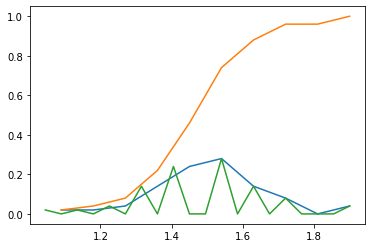

In [13]:

# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 5?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(Iris_setosa['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(Iris_setosa['PetalLengthCm'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();


[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


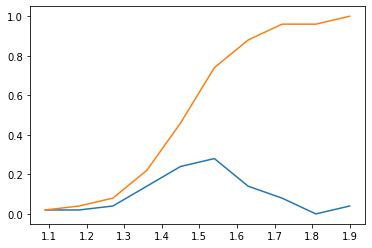

In [16]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 1.6?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(Iris_setosa['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


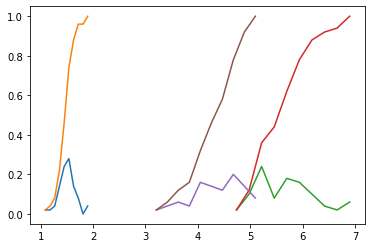

In [19]:
# Plots of CDF of petal_length for various types of flowers.

# Misclassification error if you use petal_length only.

counts, bin_edges = np.histogram(Iris_setosa['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(Iris_virginica['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(Iris_versicolor['PetalLengthCm'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();

In [5]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(Iris_setosa["PetalLengthCm"]))
#Mean with an outlier.
print(np.mean(np.append(Iris_setosa["PetalLengthCm"],50)));
print(np.mean(Iris_virginica["PetalLengthCm"]))
print(np.mean(Iris_versicolor["PetalLengthCm"]))

print("\nStd-dev:");
print(np.std(Iris_setosa["PetalLengthCm"]))
print(np.std(Iris_virginica["PetalLengthCm"]))
print(np.std(Iris_versicolor["PetalLengthCm"]))


Means:
1.464
2.4156862745098038
5.552
4.26

Std-dev:
0.17176728442867115
0.5463478745268441
0.4651881339845204


In [5]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(Iris_setosa["PetalLengthCm"]))
#Median with an outlier
print(np.median(np.append(Iris_setosa["PetalLengthCm"],50)));
print(np.median(Iris_virginica["PetalLengthCm"]))
print(np.median(Iris_versicolor["PetalLengthCm"]))


print("\nQuantiles:")
print(np.percentile(Iris_setosa["PetalLengthCm"],np.arange(0, 100, 25)))
print(np.percentile(Iris_virginica["PetalLengthCm"],np.arange(0, 100, 25)))
print(np.percentile(Iris_versicolor["PetalLengthCm"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(Iris_setosa["PetalLengthCm"],90))
print(np.percentile(Iris_virginica["PetalLengthCm"],90))
print(np.percentile(Iris_versicolor["PetalLengthCm"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(Iris_setosa["PetalLengthCm"]))
print(robust.mad(Iris_virginica["PetalLengthCm"]))
print(robust.mad(Iris_versicolor["PetalLengthCm"]))



Medians:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.3100000000000005
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


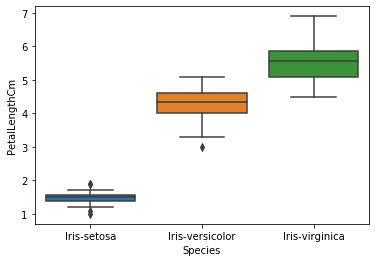

In [6]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='Species',y='PetalLengthCm', data=Iris)
plt.show()

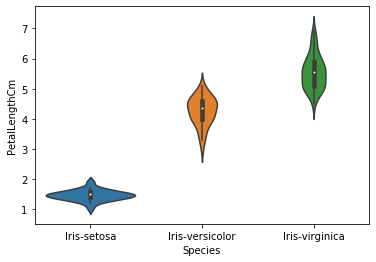

In [7]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="Species", y="PetalLengthCm", data=Iris, height=8)
plt.show()

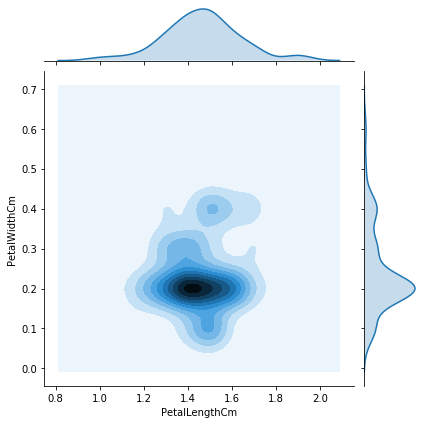

In [8]:
#2D Density plot, contors-plot
sns.jointplot(x="PetalLengthCm", y="PetalWidthCm", data=Iris_setosa, kind="kde");
plt.show();
